## Откройте файл с данными и изучите общую информацию

Необходимо проанализировать данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах  и выявить закономерности, определяющие успешность компьютерной игры. Эти данные должны помочь проранжировать пользователей, для того чтобы предлагать им актуальный продукт

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df=pd.read_csv('games.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()

### Обработайте пропуски

In [6]:
display((round((df.isnull().sum()/16715)*100,2)))

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [7]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True,)
df['rating'] = df['rating'].fillna('no rating')
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df = df.reset_index(drop=True)

Доподлинно определить наименование, год релиза и жанр не представляется возможным

### Преобразуйте данные в нужные типы

In [8]:
df['year_of_release'] = df['year_of_release'].astype('int') # год релиза - целочисленное значение 
df['critic_score'] = df['critic_score'].astype('float') # оценка критиков - целочисленное значение

Оценку пользователей со значением `tbd` согласно определению, из Википедии можно трактовать как - `To be announced` будет объявлено (TBA) или будет объявлено (TBD) – детали, возможно, были определены, но еще не готовы к объявлению, заменим неизвестным значением

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype('float') # оценка пользователей - значение с плавающей запятой 

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [10]:
df['sum_sales_game'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [11]:
count_games = df.groupby('year_of_release')['name'].agg({'count'})
count_games['%'] = count_games['count']*100/count_games['count'].sum()

In [12]:
print('Больше всего игр вышло')
display(count_games[count_games['count']==count_games['count'].max()].round(2))

Больше всего игр вышло


,count,%
year_of_release,,
2008,1427,8.68


In [13]:
print('% выхода игр по годам от общего количества выпущенных игр в период с 1980 по 2016 годы ')
display(count_games.round(2))

% выхода игр по годам от общего количества выпущенных игр в период с 1980 по 2016 годы 


,count,%
year_of_release,,
1980,9,0.05
1981,46,0.28
1982,36,0.22
1983,17,0.10
1984,14,0.09
1985,14,0.09
1986,21,0.13
1987,16,0.10
1988,15,0.09


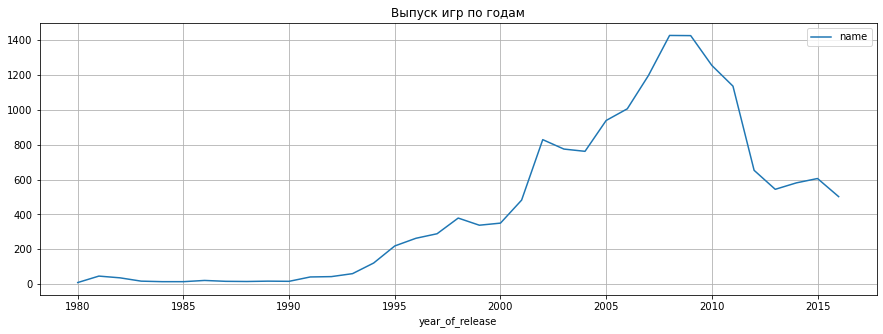

In [14]:
(
df.pivot_table(index='year_of_release', values='name', aggfunc='count')
.plot(grid=True, figsize=(15, 5),title='Выпуск игр по годам')
);

Больше всего игр было выпущено в 2008 году, в период с 1980 по 1999 наблюдался плавный рост выпускаемых игр, после 2000 и по 2008 включительно, резко возросло количество выпускаемых игр, после чего наблюдалось снижения количества выпускаемых игр до уровня 2000-2001 годов

### Как менялись продажи по платформам

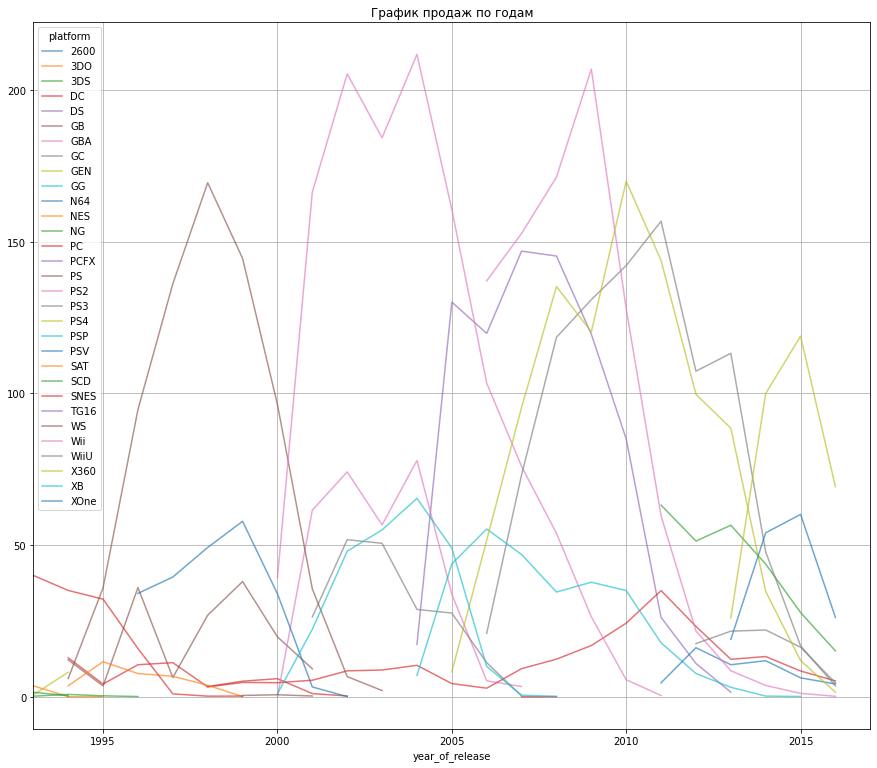

In [15]:
(df.pivot_table(index='year_of_release',columns = 'platform', values='sum_sales_game', aggfunc='sum')
.plot(grid=True,alpha = 0.65, figsize=(15, 13),title='График продаж по годам',xlim=[1993,2017]));

Стабильно в течении всего периода не прекращались продажи на платформе `PC`, на втором месте расположилась `PS2` и `PS3` продажи охватывают период в 10 лет, в среднем появление новой модели происходит раз в 5 лет, при этом актуальность предшествующей модели сохраняется еще пару лет

###  Актуальный период

Период 2015-2016 лет будет актуален для прогноза на 2017 год

In [16]:
df_15_16 = df.query("platform == ['3DS','PC','PS3','PS4','PSV','WiiU','XOne'] and 2015 <= year_of_release <=2016")
df_15_16_sum = df_15_16.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales_game', aggfunc='sum')

In [17]:
display(df_15_16_sum)

platform,3DS,PC,PS3,PS4,PSV,WiiU,XOne
year_of_release,,,,,,,
2015,27.78,8.52,16.82,118.90,6.25,16.35,60.14
2016,15.14,5.25,3.60,69.25,4.25,4.60,26.15


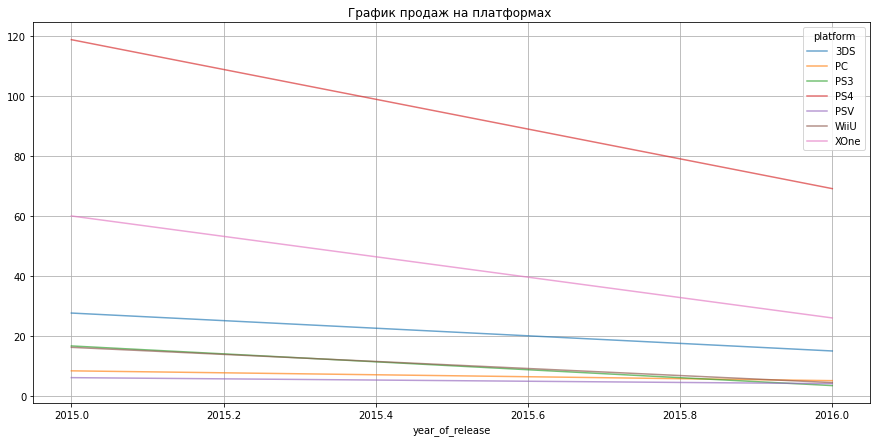

In [18]:
df_15_16_sum.plot(grid=True, alpha = 0.65, figsize=(15, 7), title='График продаж на платформах ');

Самая прибыльная платформа `PS4`, в два раза менее прибыльная `XOne`, возможно это обусловлено относительной новизной платформы, ее релиз пришелся на 2013. За период 2015-2016 годов, продажи лидирующих платформ уменьшились в среднем на 47 %

### График «ящик с усами»

In [19]:
df_15_16_top = df.query("platform == ['PS4','XOne'] and 2015 <= year_of_release <=2016")
display(df_15_16_top.groupby('platform')['sum_sales_game'].describe())

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.420,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.555,7.39


(0.0, 3.0)

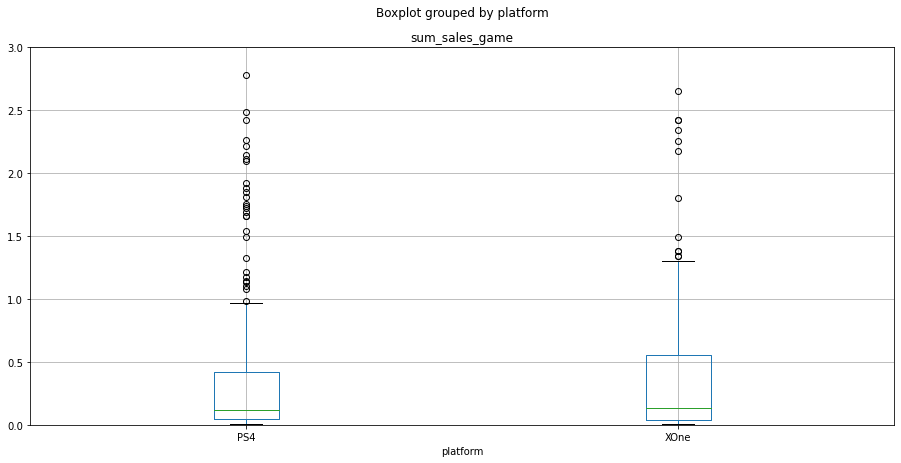

In [20]:
df_15_16_top.boxplot(column='sum_sales_game', by='platform',figsize=(15, 7))
plt.ylim([0, 3])

Среднее значение проданных копий у самых популярных платформ колеблется в промежутке от 1,2 млн. до 1,3 млн

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [21]:
df_ps4 = df[df['platform']=='PS4']
print(f'Зависимость между продажами и отзывами критиков', df_ps4['critic_score'].corr(df_ps4['sum_sales_game']).round(3))

Зависимость между продажами и отзывами критиков 0.227


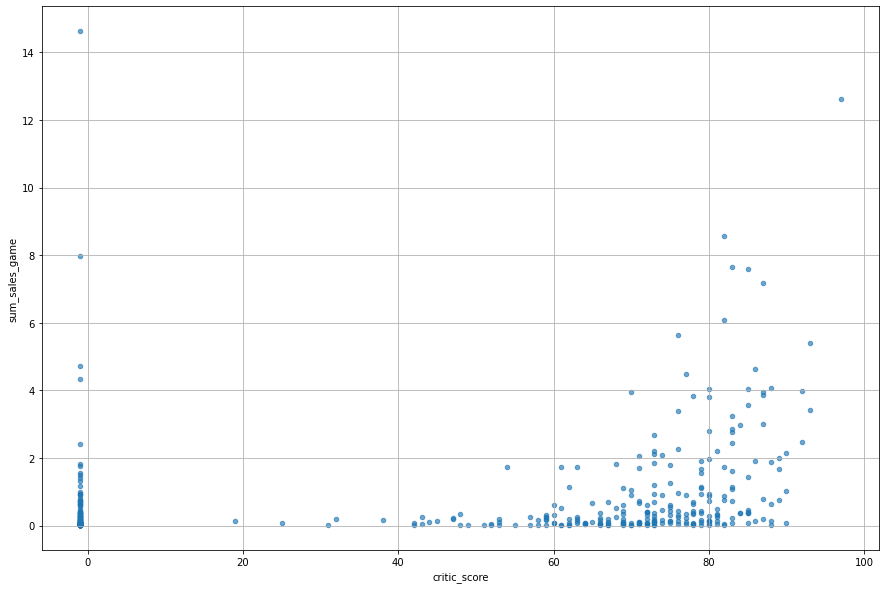

In [22]:
df_ps4.plot(x='critic_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами критиков и общими продажами слабая 0,22

In [23]:
print('Зависимость между отзывами пользователей и общими продажами',df_ps4['user_score'].corr(df_ps4['sum_sales_game']).round(3))

Зависимость между отзывами пользователей и общими продажами 0.108


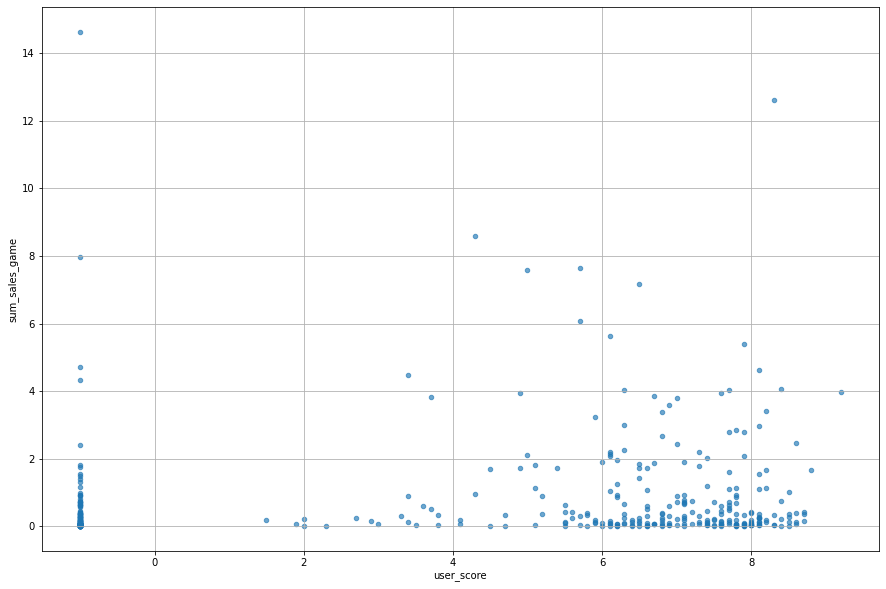

In [24]:
df_ps4.plot(x='user_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами пользователей и общими продажами крайне слабая 0,11

### Соотнесите выводы с продажами игр на других платформах.

####  Как влияют на продажи платформы `XOne` отзывы пользователей и критиков

In [25]:
df_xone = df[df['platform']=='XOne']
print('Зависимость между отзывами критиков и продажами XOne',df_xone['critic_score'].corr(df_xone['sum_sales_game']).round(3))

Зависимость между отзывами критиков и продажами XOne 0.274


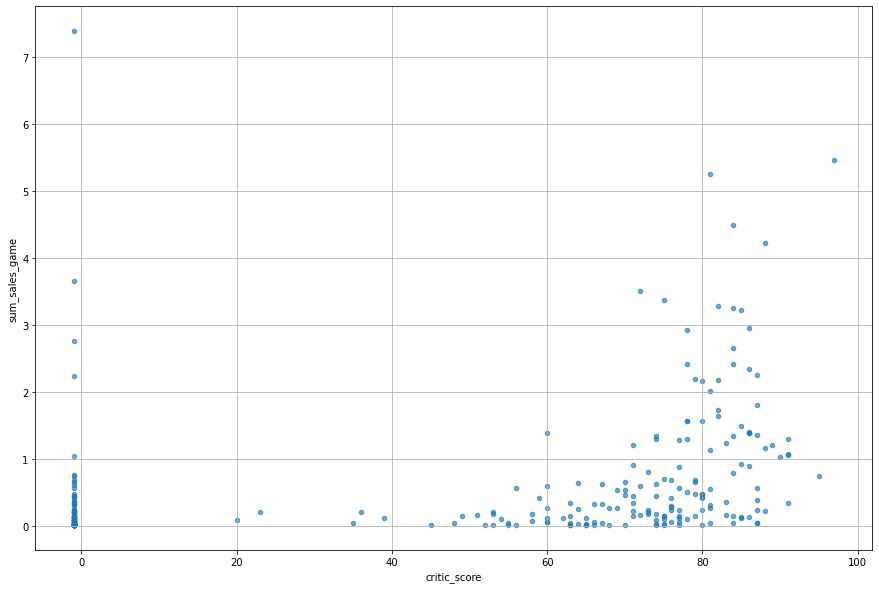

In [26]:
df_xone.plot(x='critic_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами критиков и общими продажами слабая 0,27

In [27]:
print('Зависимость между отзывами пользователей и продажами XOne',df_xone['user_score'].corr(df_xone['sum_sales_game']).round(3))

Зависимость между отзывами пользователей и продажами XOne 0.085


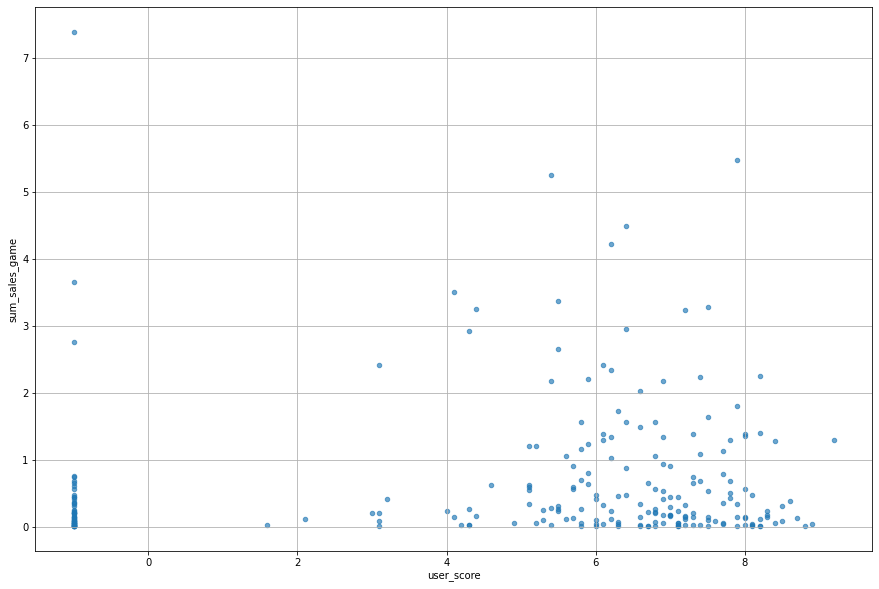

In [28]:
df_xone.plot(x='user_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами пользователей и общими продажами отсутсвует

#### Как влияют на продажи платформы `WiiU` отзывы пользователей и критиков

In [29]:
df_wiiu = df[df['platform']=='WiiU']
print('Зависимость между отзывами критиков и продажами WiiU',df_wiiu['critic_score'].corr(df_wiiu['sum_sales_game']).round(3))

Зависимость между отзывами критиков и продажами WiiU 0.297


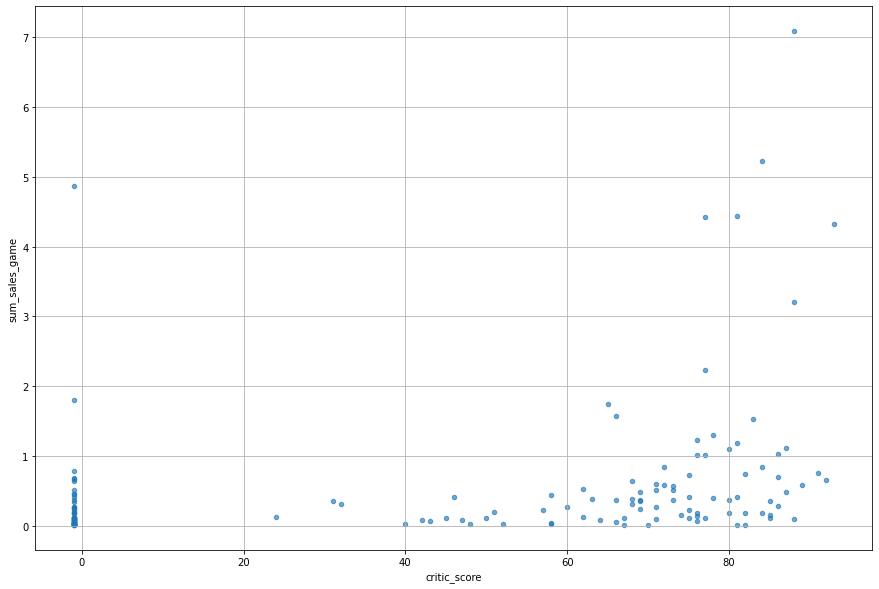

In [30]:
df_wiiu.plot(x='critic_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами критиков и общими продажами слабая 0,30

In [31]:
print('Зависимость между отзывами пользователей и продажами WiiU',df_wiiu['user_score'].corr(df_wiiu['sum_sales_game']).round(3))

Зависимость между отзывами пользователей и продажами WiiU 0.246


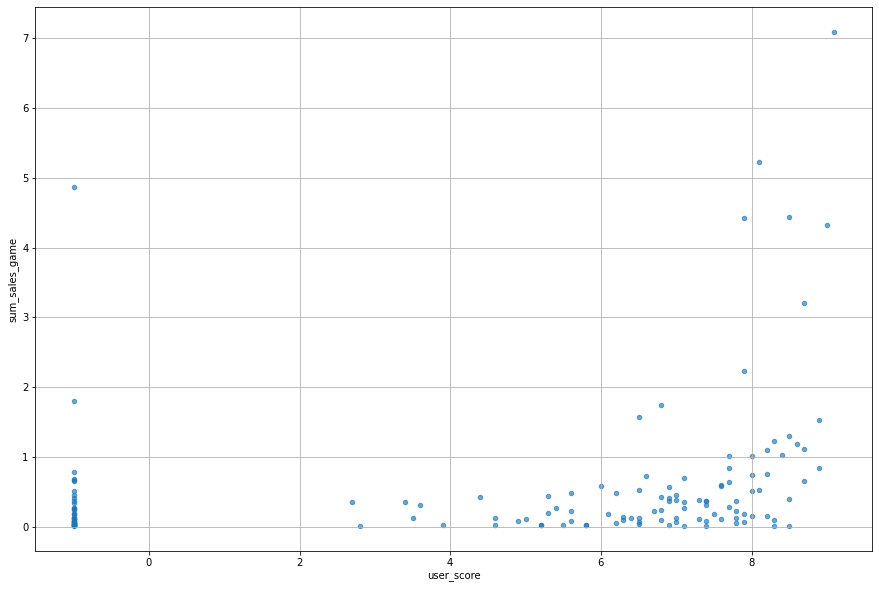

In [32]:
df_wiiu.plot(x='user_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами пользователей и общими продажами слабая 0,25

#### Как влияют на продажи платформы `3DS` отзывы пользователей и критиков

In [33]:
df_3ds = df[df['platform']=='3DS']
print('Зависимость между отзывами критиков и продажами 3DS', df_3ds['critic_score'].corr(df_3ds['sum_sales_game']).round(3))

Зависимость между отзывами критиков и продажами 3DS 0.166


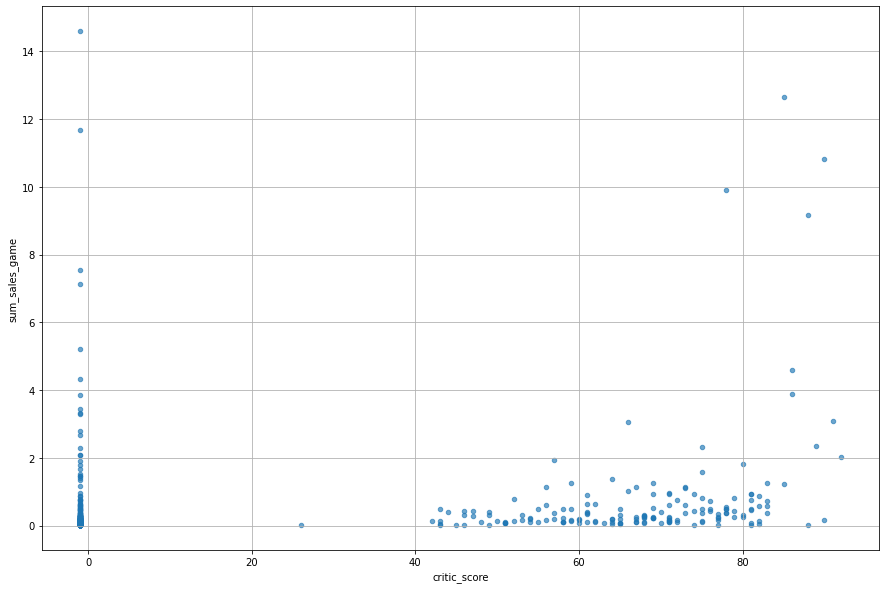

In [34]:
df_3ds.plot(x='critic_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами критиков и общими продажами крайне слабая 0,17

In [35]:
print('Зависимость между отзывами пользователей и продажами 3DS',df_3ds['user_score'].corr(df_3ds['sum_sales_game']).round(3))

Зависимость между отзывами пользователей и продажами 3DS 0.127


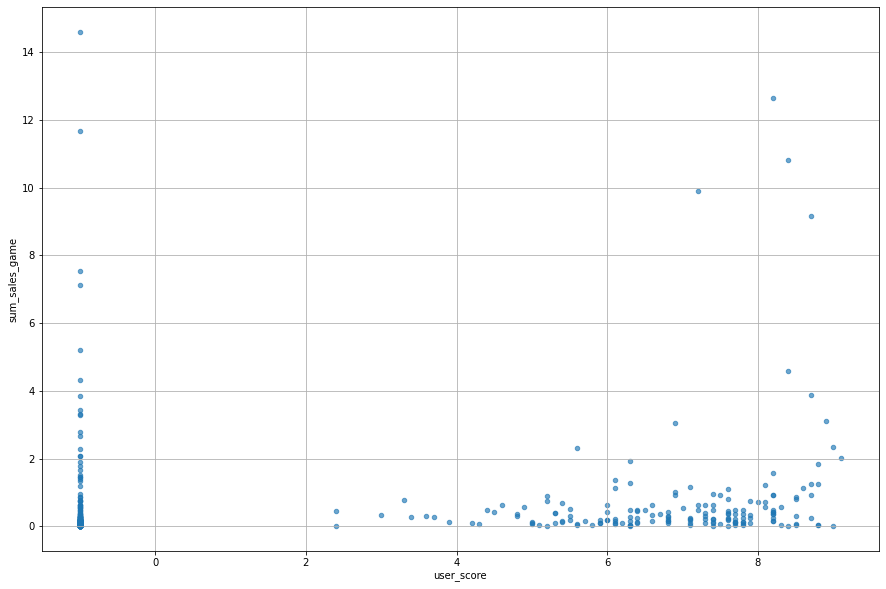

In [36]:
df_3ds.plot(x='user_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами пользователей и общими продажами крайне слабая 0,13

#### Как влияют на продажи платформы `PC` отзывы пользователей и критиков

In [37]:
df_pc = df[df['platform']=='PC']
print('Зависимость между отзывами критиков и продажами PC:',df_pc['critic_score'].corr(df_pc['sum_sales_game']).round(3))

Зависимость между отзывами критиков и продажами PC: 0.079


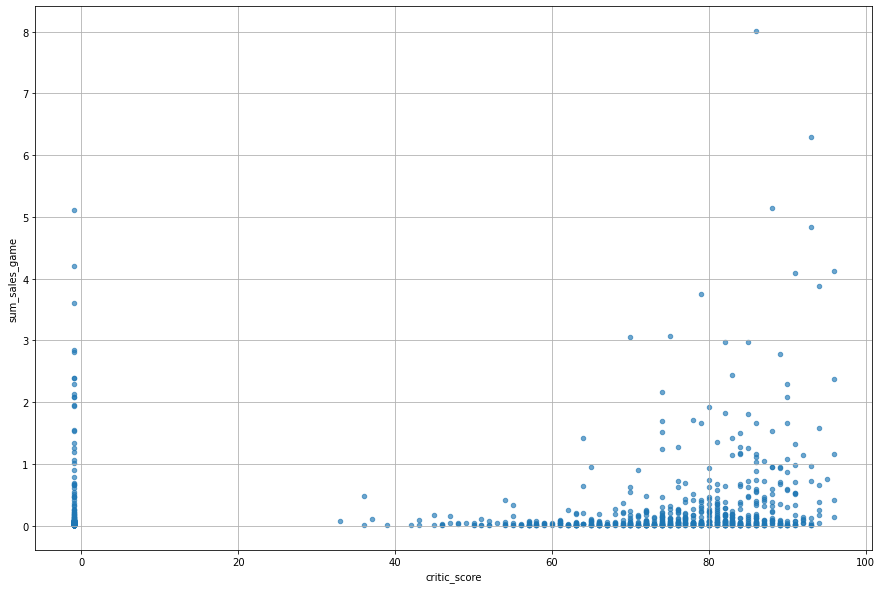

In [38]:
df_pc.plot(x='critic_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами критиков и общими продажами отсутсвует

In [39]:
print('Зависимость между отзывами пользователей и продажами PC:', df_pc['user_score'].corr(df_pc['sum_sales_game']).round(3))

Зависимость между отзывами пользователей и продажами PC: -0.022


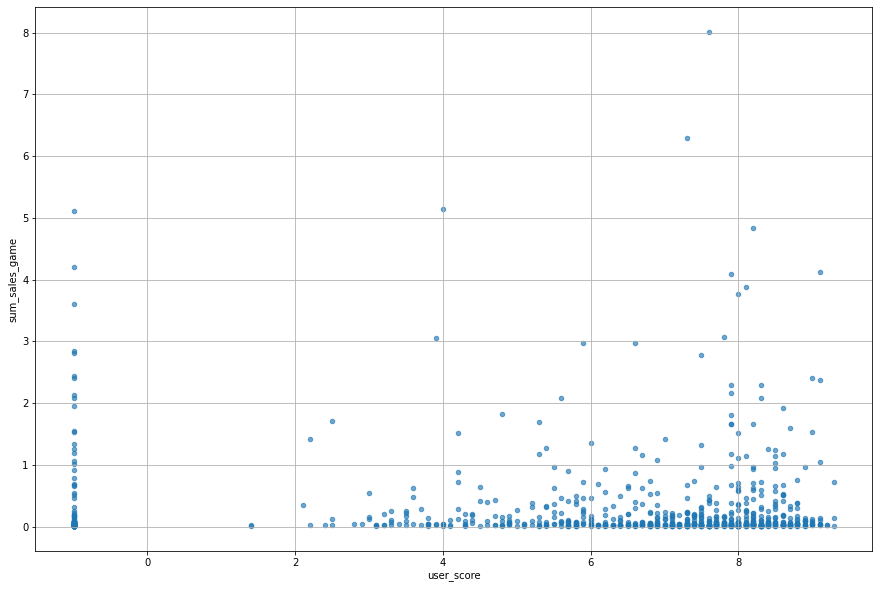

In [40]:
df_pc.plot(x='user_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами пользователей и общими продажами отсутствует

#### Как влияют на продажи платформы `PSV` отзывы пользователей и критиков

In [41]:
df_psv = df[df['platform']=='PSV']
print('Зависимость между отзывами критиков и продажами PSV',df_psv['critic_score'].corr(df_psv['sum_sales_game']).round(3))

Зависимость между отзывами критиков и продажами PSV 0.403


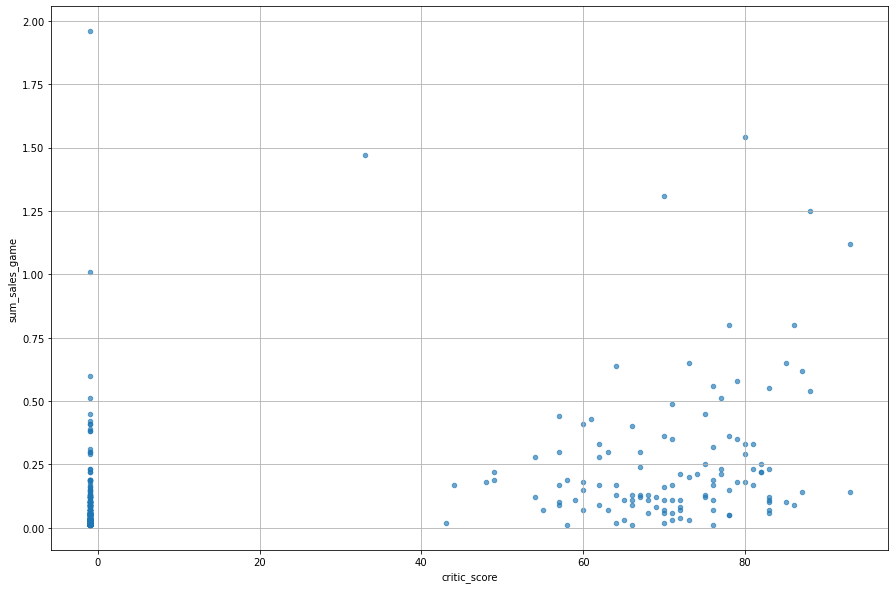

In [42]:
df_psv.plot(x='critic_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами критиков и общими продажами слабая 0,4

In [43]:
print('Зависимость между отзывами пользователей и продажами PSV',df_psv['user_score'].corr(df_psv['sum_sales_game']).round(3))

Зависимость между отзывами пользователей и продажами PSV 0.376


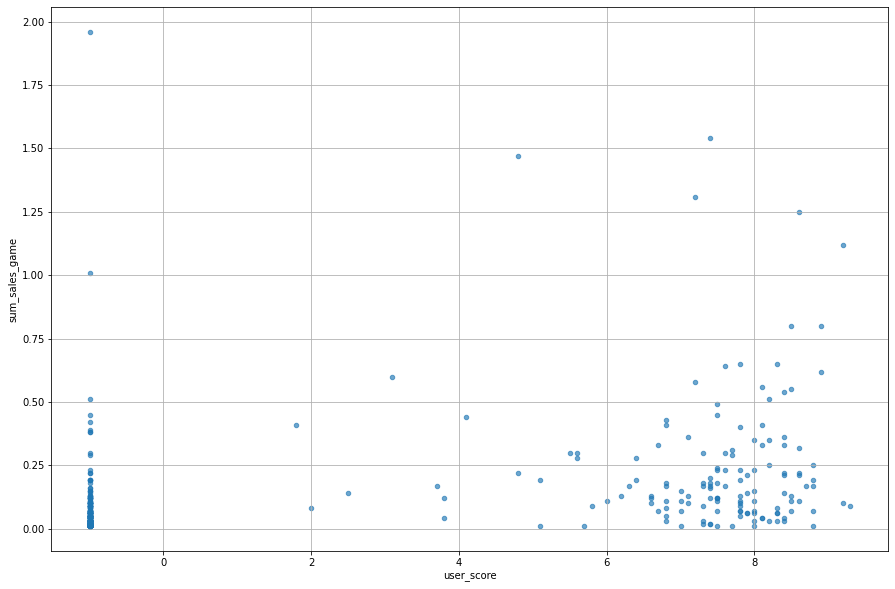

In [44]:
df_psv.plot(x='user_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами пользователей и общими продажами слабая 0,38

#### Как влияют на продажи платформы `PS3` отзывы пользователей и критиков

In [45]:
df_ps3 = df[df['platform']=='PS3']
print('Зависимость между отзывами критиков и продажами PS3:',df_ps3['critic_score'].corr(df_ps3['sum_sales_game']).round(3))

Зависимость между отзывами критиков и продажами PS3: 0.354


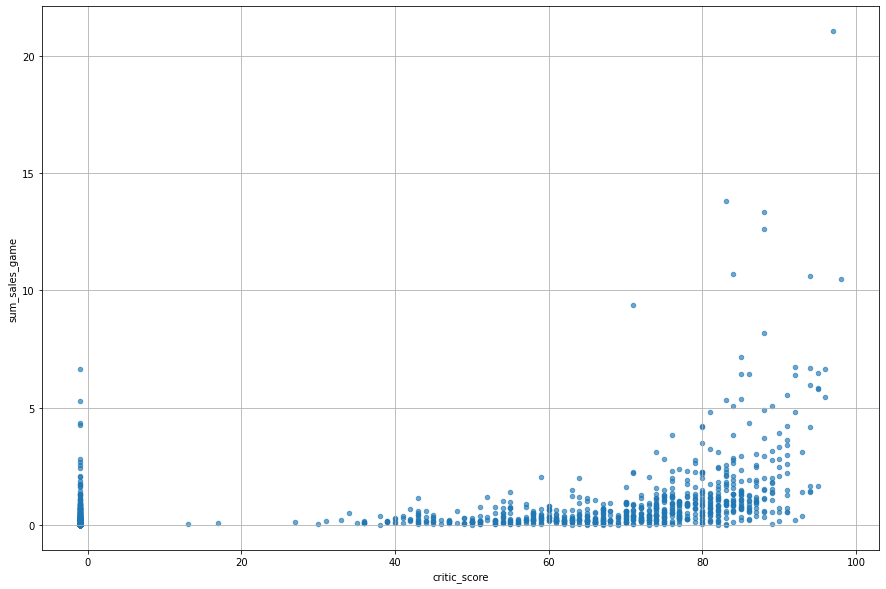

In [46]:
df_ps3.plot(x='critic_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами критиков и общими продажами слабая 0,35

In [47]:
print('Зависимость между отзывами пользователей и продажами PS3:',df_ps3['user_score'].corr(df_ps3['sum_sales_game']).round(3))

Зависимость между отзывами пользователей и продажами PS3: 0.251


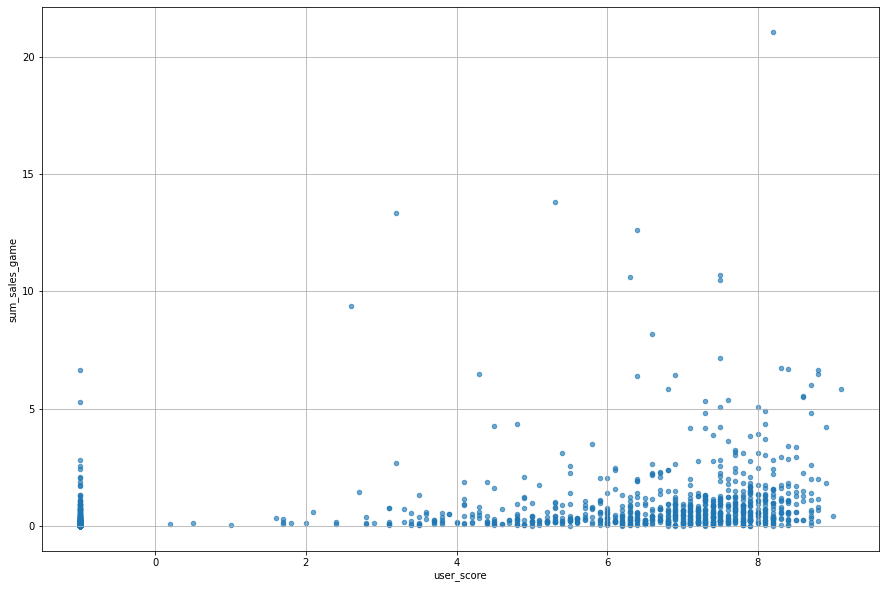

In [48]:
df_ps3.plot(x='user_score', y='sum_sales_game', grid=True, kind='scatter', alpha=0.65, figsize=(15,10));

Зависимость между отзывами пользователей и общими продажами крайне слабая 0,25

### Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [49]:
df_genre_top = round(df.pivot_table(index='genre', values='sum_sales_game', aggfunc='mean').sort_values('sum_sales_game',ascending=False).reset_index().rename_axis(None, axis=1), 3)
display(df_genre_top)

,genre,sum_sales_game
0,Platform,0.940
1,Shooter,0.804
2,Role-Playing,0.629
3,Racing,0.590
4,Sports,0.568
5,Fighting,0.529
6,Action,0.519
7,Misc,0.459
8,Simulation,0.453
9,Puzzle,0.422


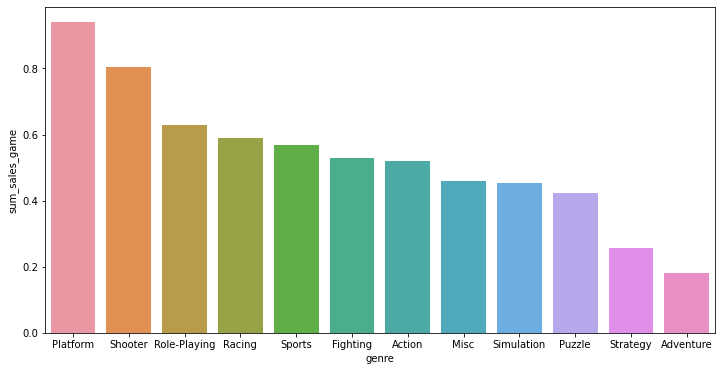

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_genre_top, x='genre', y='sum_sales_game');

Топ 3 жанра по продажам занимают Platform, Shooter, Role-Playing. В тройку аутсайдеров входят Puzzle, Strategy, Adventure

`Вывод по Шаг 3. Проведите исследовательский анализ данных:`

- Самая популярная платформа выпускается компанией - Sony, относительно свежая но быстро набирающая популярность XOne.

- Стабильно в течении всего периода не прекращались продажи на платформе PC, на втором месте расположилась PS2 и PS3 продажи охватывают период в 10 лет, в среднем появление новой модели происходит раз в 5 лет, при этом актуальность предшествующей модели сохраняется еще пару лет.

- Среднее значение проданных копий у самых популярных платформ колеблется в промежутке от 750 до 940 тысяч, больше всего продаж приходится на Sony и XOne.

- На продажи в основнгм влияют оценки критиков, оценки пользователей практически не влияют на уровень продаж.

- Самый популярный жанр Action, самый отстающий Якорем висит жанр Strategy.

## Составьте портрет пользователя каждого региона (NA, EU, JP)

### NA

#### Самые популярные платформы (топ-5)

In [51]:
print(df_15_16.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5))

platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
PS3      5.66
Name: na_sales, dtype: float64


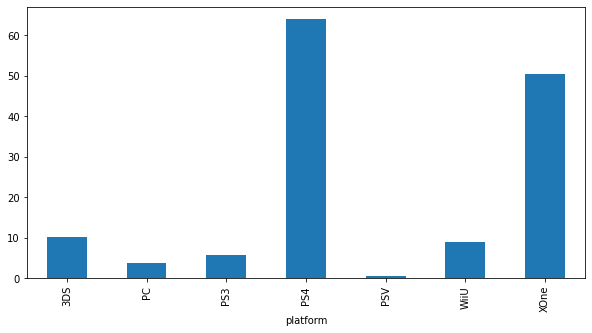

In [52]:
df_15_16.groupby('platform')['na_sales'].sum().plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(10,5));

#### Самые популярные жанры (топ-5)

In [53]:
print(df_15_16.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))

genre
Shooter         46.61
Action          31.87
Sports          23.22
Role-Playing    19.82
Fighting         5.37
Name: na_sales, dtype: float64


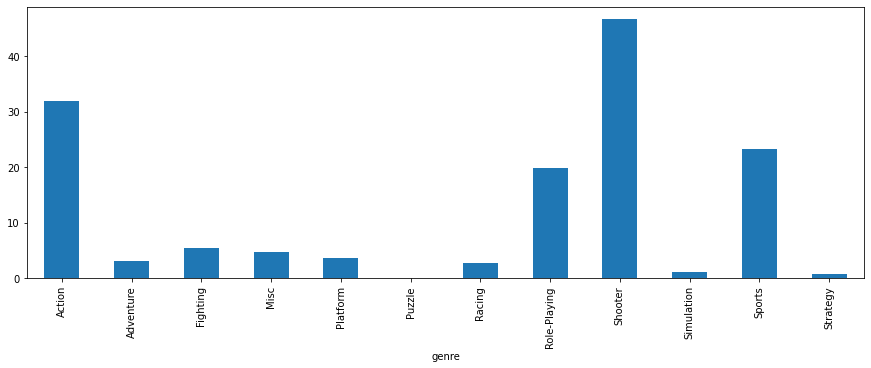

In [54]:
df_15_16.groupby('genre')['na_sales'].sum().plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(15,5));

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
print(df_15_16.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5))

rating
M            46.50
no rating    34.97
E            23.75
T            21.87
E10+         16.16
Name: na_sales, dtype: float64


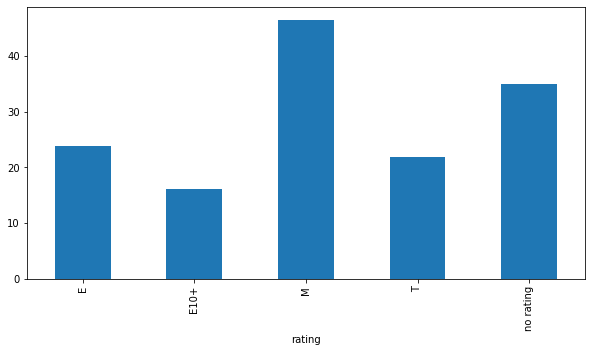

In [56]:
df_15_16.groupby('rating')['na_sales'].sum().plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(10,5));

Для региона `NA` портрет пользователя выглядит следующим образом - Человек который любит играть в игры с жанром Shooter, Action с рейтингом "M" и 'no rating' на платформах PS4 и XOne

### EU

#### Самые популярные платформы (топ-5)

In [57]:
print(df_15_16.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5))

platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64


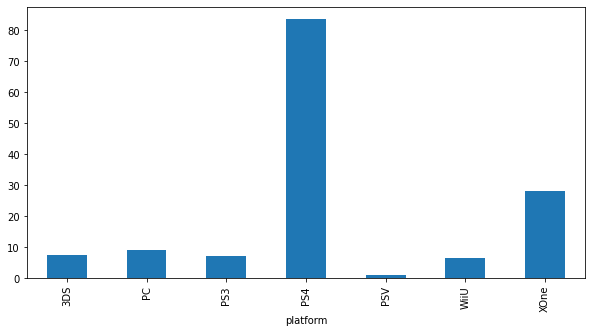

In [58]:
df_15_16.groupby('platform')['eu_sales'].sum().plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(10,5));

#### Самые популярные жанры (топ-5)

In [59]:
print(df_15_16.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))

genre
Shooter         39.69
Action          33.44
Sports          26.24
Role-Playing    17.21
Racing           6.51
Name: eu_sales, dtype: float64


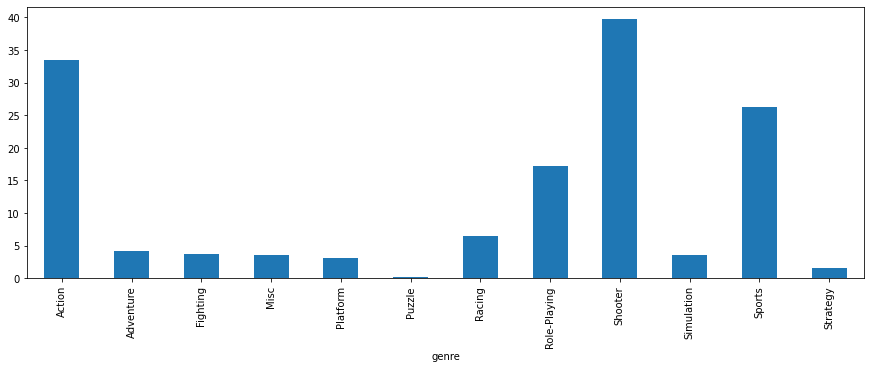

In [60]:
df_15_16.groupby('genre')['eu_sales'].sum().plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(15,5));

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [61]:
print(df_15_16.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5))

rating
M            45.26
no rating    34.29
E            33.32
T            19.92
E10+         10.21
Name: eu_sales, dtype: float64


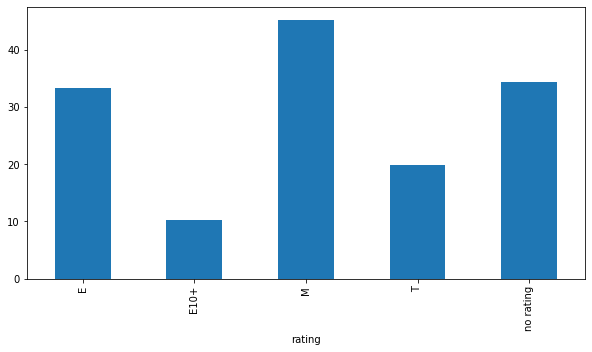

In [62]:
df_15_16.groupby('rating')['eu_sales'].sum().plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(10,5));

Для региона `EU` портрет пользователя выглядит следующим образом - Человек который любит играть в игры с жанром Shooter, Action с рейтингом "M", 'no rating' и 'E' на платформе PS4

### JP

#### Самые популярные платформы (топ-5)

In [63]:
print(df_15_16.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5))

platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
Name: jp_sales, dtype: float64


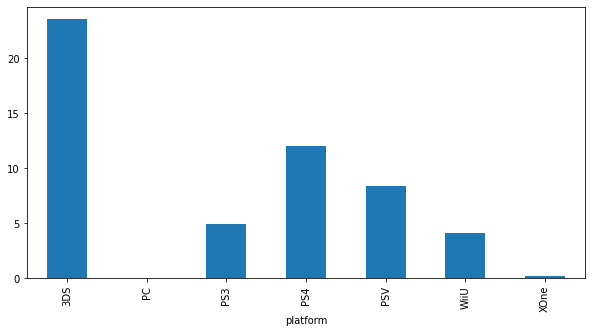

In [64]:
df_15_16.groupby('platform')['jp_sales'].sum().plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(10,5));

#### Самые популярные жанры (топ-5)

In [65]:
print(df_15_16.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5))

genre
Action          22.93
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64


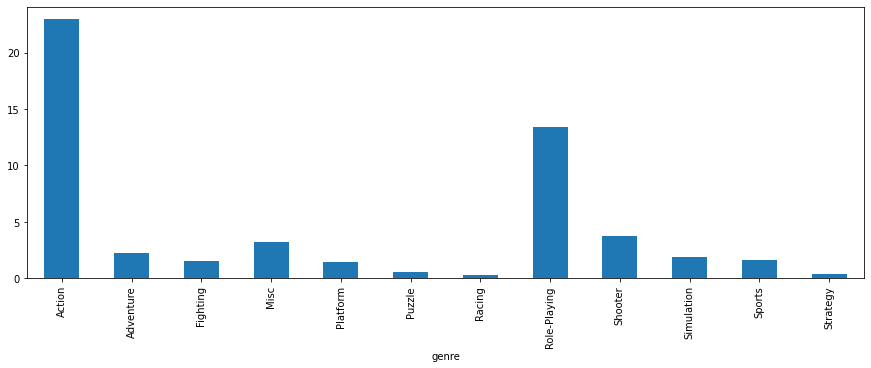

In [66]:
df_15_16.groupby('genre')['jp_sales'].sum().plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(15,5));

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [67]:
print(df_15_16.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5))

rating
no rating    32.77
T             7.70
E             5.25
M             4.29
E10+          3.27
Name: jp_sales, dtype: float64


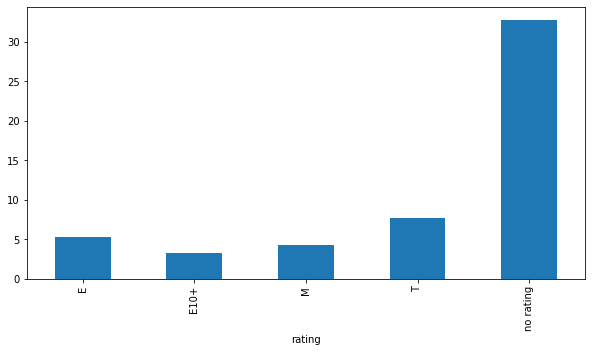

In [68]:
df_15_16.groupby('rating')['jp_sales'].sum().plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(10,5));

Для региона `JP` портрет пользователя выглядит следующим образом - Человек который любит играть в игры с жанром Action и Role-Playing на платформах 3DS и PS4 в игры, рейтинг которых не определен

`Вывод по Шаг 4. Составьте портрет пользователя каждого региона:`

- Платформы PS4 и XOne наиболее популярны в регионах NA и EU, в регионе JP на первом месте стоит платформа 3DS, PS4 пользуются в два раза меньше пользователей.

- В регионах NA и EU лидирующие позиции занимают жанры Action и Shooter, в то же время в JP, жанр Shooter уступает Role-Playing, который в свою очередь не входит в тройку лидеров жанров среди пользователей NA и EU.

- В регионах NA и EU пользуются популярностью игры в основном с рейтингом M/no rating, в JP рейтинг подавляющего большинства игр (62%) - no rating.

Можно говорить о том, что у пользователей NA/EU много общего, в то время как совокупное NA/EU сильно разниться с JP.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [69]:
xbox = df_15_16[(df_15_16['platform'] == 'XOne') | (df_15_16['user_score'] != -1)]
pc = df_15_16[(df_15_16['platform'] == 'PC') | (df_15_16['user_score'] != -1)]

xbox_sample = xbox['user_score']
pc_sample = pc['user_score']

print(f'Дисперсия xbox: {np.var(xbox_sample):.3f}')
print(f'Дисперсия PC: {np.var(pc_sample):.3f}')

Дисперсия xbox: 5.797
Дисперсия PC: 4.103


In [70]:
alpha = 0.05 

results = st.ttest_ind(xbox_sample.dropna(), pc_sample.dropna(), equal_var=False)

print(f'p-значение {results.pvalue:.3f}')

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение 0.059
Не получилось отвергнуть нулевую гипотезу


Не получилось опровергнуть что средние рейтинги Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action  и Sports разные.

- Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports различаются

In [71]:
аction = df_15_16[(df_15_16['genre'] == 'Action') | (df_15_16['user_score'] != -1)]
sports = df_15_16[(df_15_16['genre'] == 'Sports') | (df_15_16['user_score'] != -1)]

аction_sample = аction['user_score']
sports_sample = sports['user_score']

print(f'Дисперсия Action: {np.var(аction_sample):.3f}')
print(f'Дисперсия Sports: {np.var(sports_sample):.3f}')

Дисперсия Action: 13.678
Дисперсия Sports: 4.007


In [72]:
alpha = 0.05 

results = st.ttest_ind(аction_sample.dropna(), sports_sample.dropna(), equal_var=False)

print(f'p-значение: {results.pvalue:.3f}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.000
Отвергаем нулевую гипотезу


Нулевая гипотеза о том что средние рейтинги жанров Action и Sports одинаковые, отвергается

При проверке гипотез применялся метод st.ttest_ind, с условием что дисперсии выборок не равны

## Итог

После анализа данных были выявленны следующие закономерности:

- При планировании рекламных компаний следует учитывать что наиоблее авторитетным мнением для пользователя является оценка критика

- Рынок NA и EU ориентирован на исползование платформы PS4 и набирающую популярность XOne, приоритетными жанрами являются Action и Shooter с рейтингом M/no rating

- Рынок JP ориентирован на исползование платформы 3DS, приоритетными жанрами являются Action и Role-Playing с рейтингом no rating